In this segment, the objective is to sort our customers based on their LTVs. We can use this knowledge to provide premium membership or special discounts to those customers who have very high LTVs.

### Sorting

In [4]:
# bubble sort
def my_sort(xs, f= lambda x: x):
    for i in range(len(xs) - 1):
        for j in range(i, len(xs)):
            if f(xs[i]) < f(xs[j]):
                xs[i], xs[j] = xs[j], xs[i]
    return xs

In [13]:
res = {key: val for key, val in sorted(test_dict.items(), key = lambda ele: ele[0])}
res

In [12]:
test_dict= {'a': 3, 'b': 2, 'c': 1}

In [14]:
res

{'a': 3, 'b': 2, 'c': 1}

In [5]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
conn= sqlite3.connect('churn.db')

#### Creating a dataframe for sorting LTV

In [7]:
LTV= pd.read_sql('select customerID, TotalCharges from churn_all', conn)

In [8]:
# Converting TotalCharges to numeric
LTV.TotalCharges.replace(' ','0',inplace= True)    # replacing ' ' with zero

# Now converting datatype ot numeric 
LTV.TotalCharges= pd.to_numeric(LTV.TotalCharges)

In [9]:
LTV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customerID    7043 non-null   object 
 1   TotalCharges  7043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


In [10]:
LTV_dict= LTV.set_index('customerID').T.to_dict('records')[0]

In [11]:
res = {key: val for key, val in sorted(LTV_dict.items(), key = lambda ele: ele[1])}

In [12]:
res

{'4472-LVYGI': 0.0,
 '3115-CZMZD': 0.0,
 '5709-LVOEQ': 0.0,
 '4367-NUYAO': 0.0,
 '1371-DWPAZ': 0.0,
 '7644-OMVMY': 0.0,
 '3213-VVOLG': 0.0,
 '2520-SGTTA': 0.0,
 '2923-ARZLG': 0.0,
 '4075-WKNIU': 0.0,
 '2775-SEFEE': 0.0,
 '2967-MXRAV': 18.8,
 '9318-NKNFC': 18.85,
 '8992-CEUEN': 18.85,
 '9975-SKRNR': 18.9,
 '1423-BMPBQ': 19.0,
 '1015-OWJKI': 19.05,
 '6121-VZNQB': 19.1,
 '6569-KTMDU': 19.1,
 '9441-QHEVC': 19.1,
 '7302-ZHMHP': 19.15,
 '1663-MHLHE': 19.2,
 '3308-MHOOC': 19.2,
 '4232-JGKIY': 19.2,
 '3373-YZZYM': 19.2,
 '5510-BOIUJ': 19.25,
 '1098-TDVUQ': 19.25,
 '9374-YOLBJ': 19.25,
 '0761-AETCS': 19.3,
 '4667-OHGKG': 19.3,
 '7926-IJOOU': 19.3,
 '1724-IQWNM': 19.3,
 '5766-ZJYBB': 19.4,
 '9629-NHXFW': 19.4,
 '7298-IZWLY': 19.4,
 '2220-IAHLS': 19.4,
 '1725-MIMXW': 19.45,
 '9174-FKWZE': 19.45,
 '4760-XOHVN': 19.45,
 '3679-XASPY': 19.45,
 '7617-EYGLW': 19.45,
 '8393-JMVMB': 19.45,
 '7551-JOHTI': 19.5,
 '5906-BFOZT': 19.5,
 '8566-YPRGL': 19.5,
 '1905-OEILC': 19.5,
 '1029-QFBEN': 19.55,
 '2866-IKB

#### Tagging Customers

In [13]:
# we want to tag customers into LOW LTV & HIGH LTV w.r.t a LTV value, we can do it by defining a fun. & then mapping it to datafrme

def create_seg(df, LTV_col, Target_col, LTV_value, upper_seg= 'High', lower_seg= 'Low' ):
    
    df[Target_col]= df[LTV_col].apply(lambda x:  upper_seg if x> LTV_value else lower_seg)
    return df


In [14]:
df= pd.read_sql('select * from churn_all',conn)
df.head(2)

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes


In [15]:
# Converting TotalCharges to numeric
df.TotalCharges.replace(' ','0',inplace= True)    # replacing ' ' with zero
# Now converting datatype ot numeric 
df.TotalCharges= pd.to_numeric(df.TotalCharges)

In [16]:
# definging LTV_val 
LTV_value= np.percentile(df.TotalCharges, 80)

In [17]:
# Mapping the segemnt colm
churn_tagged= create_seg(df, 'TotalCharges', 'LTV_segement', LTV_value)

In [18]:
churn_tagged.head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,LTV_segement
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes,Low
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes,Low
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes,Low


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'LTV_SEGMENTS')

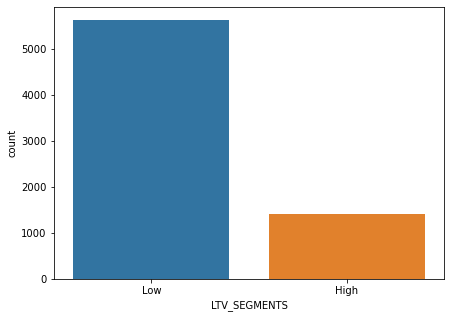

In [21]:
plt.figure(figsize= (7,5))
sns.countplot(churn_tagged.LTV_segement)
plt.xlabel('LTV_SEGMENTS')

In [26]:
churn_tagged.LTV_segement.value_counts()

Low     5634
High    1409
Name: LTV_segement, dtype: int64

So our High lifetime value & Low liftime value customers has been tagged. Now we can target our individual customers based on their LTV. And take measures to retain High Lifetime value customers & making changes in services to have better results from Low Lifetime Value customers.